When submitting a pull request (PR) to a [Travis CI](https://www.travis-ci.com/) enabled project, an error can occur in the build whose cause is not obvious.
While it is possible to debug such an error by committing and pushing to trigger a rebuild, this workflow does not [fail-fast](https://en.wikipedia.org/wiki/Fail-fast).
A much better approach is to replicate the build environment Travis uses by obtaining the corresponding [Docker](https://www.docker.com/) image.

To do so, navigate to the Travis CI **Job log**.
Under **Worker information**, locate the instance name:

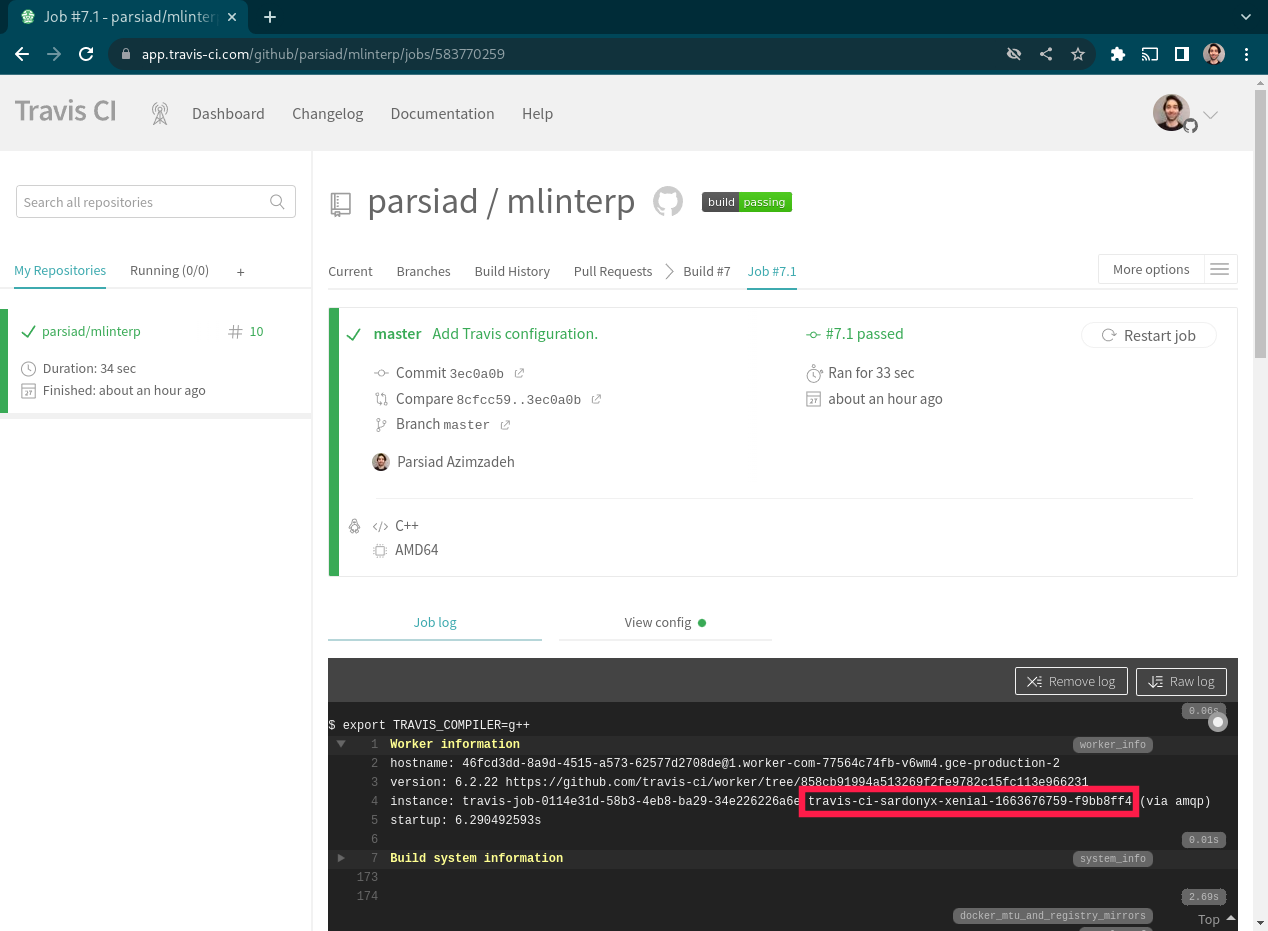

Pull the corresponding Docker image:
```console
$ INSTANCE=travisci/ci-sardonyx:packer-1663676759-f9bb8ff4
$ docker pull $INSTANCE
```

Create the container and attach to it:
```console
$ NAME=travis_$(uuidgen)
$ docker run --name $NAME -dit $INSTANCE /sbin/init
$ docker exec -it $NAME bash -l
```

Inside the container, assume the role of the `travis` user:
```console
$ su - travis
```

You can now execute the commands shown in the **Job log** (*after* **Build system information**) in an environment identical to the one used by Travis CI.